In [21]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB, ComplementNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import NearestCentroid

from sklearn.datasets import fetch_covtype, fetch_california_housing
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    mean_squared_error,
    r2_score,
    max_error,
    explained_variance_score,
)
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [27]:
print(fetch_covtype()['DESCR'])

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

=================   ============
Classes                        7
Samples total             581012
Dimensionality                54
Features                     int
=================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional argument 'as_frame' is
se

---
# Классная работа

In [3]:
dataset = pd.read_csv(
    "https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML4.1%20metrics/heart.csv"
)
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Без деления на выборки
y = dataset["output"]
x = dataset.drop("output", axis=1)

logistic = LogisticRegression().fit(x, y)
print("Точность на данных обучения:", logistic.score(x, y))

Точность на данных обучения: 0.8547854785478548


In [5]:
# Деление выбоки вручную
x_train, y_train = x[:200], y[:200]
x_test, y_test = x[200:], y[200:]
print("Стркои для обучения:", x_train.shape[0])
print("Стркои для проверки:", x_test.shape[0])
print()

logistic_test = LogisticRegression().fit(x_train, y_train)
print("Точность на тренировочном датасете:", logistic_test.score(x_train, y_train))
print("Точность на тестовом датасете:", logistic_test.score(x_test, y_test))


Стркои для обучения: 200
Стркои для проверки: 103

Точность на тренировочном датасете: 0.9
Точность на тестовом датасете: 0.5436893203883495


In [6]:
# Деление выборки 80 на 20

N = int(x.shape[0] * 0.8)

x_train, y_train, x_test, y_test = x[:N], y[:N], x[N:], y[N:]
print("Стркои для обучения:", x_train.shape[0])
print("Стркои для проверки:", x_test.shape[0])
print()

logistic_test = LogisticRegression().fit(x_train, y_train)
print("Точность на тренировочном датасете:", logistic_test.score(x_train, y_train))
print("Точность на тестовом датасете:", logistic_test.score(x_test, y_test))


Стркои для обучения: 242
Стркои для проверки: 61

Точность на тренировочном датасете: 0.8884297520661157
Точность на тестовом датасете: 0.6229508196721312


In [7]:
# Выбор с помощью маски
N = 200
mask = np.array([True] * N + [False] * (y.shape[0] - N))
np.random.seed(1223)
np.random.shuffle(mask)

x_train, y_train, x_test, y_test = x[mask], y[mask], x[~mask], y[~mask]
print("Стркои для обучения:", x_train.shape[0])
print("Стркои для проверки:", x_test.shape[0])
print()
logistic_test = LogisticRegression().fit(x_train, y_train)
print("Точность на тренировочном датасете:", logistic_test.score(x_train, y_train))
print("Точность на тестовом датасете:", logistic_test.score(x_test, y_test))


Стркои для обучения: 200
Стркои для проверки: 103

Точность на тренировочном датасете: 0.87
Точность на тестовом датасете: 0.8155339805825242


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
logistic_test = LogisticRegression().fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)


(0.8636363636363636, 0.819672131147541)

In [9]:
y_test_pred = logistic_test.predict(x_test)
y_train_pred = logistic_test.predict(x_train)

In [10]:
# Матрица ошибок на тренировочных данных
confusion_matrix(y_train, y_train_pred)

array([[ 85,  23],
       [ 10, 124]], dtype=int64)

In [11]:
# Матрица ошибок на тестовых данных
confusion_matrix(y_test, y_test_pred)


array([[22,  8],
       [ 3, 28]], dtype=int64)

In [12]:
# Отчет о классификации
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80        30
           1       0.78      0.90      0.84        31

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [13]:
# Точность, отношения верных предсказаний, по отношению ко всем
precision_score(y_test, y_test_pred)

0.7777777777777778

In [14]:
# Сбор всех статистик

metrics = pd.DataFrame(
    {
        "Train": [
            accuracy_score(y_train, y_train_pred),
            precision_score(y_train, y_train_pred),
            recall_score(y_train, y_train_pred),
            f1_score(y_train, y_train_pred),
        ],
        "Test": [
            accuracy_score(y_test, y_test_pred),
            precision_score(y_test, y_test_pred),
            recall_score(y_test, y_test_pred),
            f1_score(y_test, y_test_pred),
        ],
    },
    index=["Accuracy", "Precision", "Recall", "F1"],
)

metrics


,Train,Test
Accuracy,0.863636,0.819672
Precision,0.843537,0.777778
Recall,0.925373,0.903226
F1,0.882562,0.835821


---
# Задания для самостоятельного выполнения


1) Повторите анализ для других видов моделей. Используйте 5-10 разных классов моделей. Подсчитывайте только метрики на тестовой выборке.

In [15]:
models = [
    GaussianNB,
    ComplementNB,
    BernoulliNB,
    DecisionTreeClassifier,
    SVC,
    NearestCentroid,
]
metrics = {}
for model_class in models:
    model = model_class().fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    metrics[model_class.__name__] = [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred),
        recall_score(y_train, y_train_pred),
        f1_score(y_train, y_train_pred),
    ]

metrics = pd.DataFrame(metrics, index=["Accuracy", "Precision", "Recall", "F1"])
display(metrics.style.set_properties(**{"text-align": "center"}))


,GaussianNB,ComplementNB,BernoulliNB,DecisionTreeClassifier,SVC,NearestCentroid
Accuracy,0.847107,0.747934,0.826446,1.000000,0.661157,0.648760
Precision,0.843972,0.770370,0.838235,1.000000,0.651163,0.676259
Recall,0.888060,0.776119,0.850746,1.000000,0.835821,0.701493
F1,0.865455,0.773234,0.844444,1.000000,0.732026,0.688645


2) Повторите анализ для другого датасета по вашему выбору. Используйте несколько моделей для сравнения. Используйте датасет для множественной классификации.

In [16]:
dataset = fetch_covtype()
x = dataset.data
y = dataset.target


In [17]:
def analise(model_class, x, y, train_size=0.8, average="weighted"):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_size)
    model = model_class().fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    metrics = pd.DataFrame(
        {
            "Train": [
                accuracy_score(y_train, y_train_pred),
                precision_score(y_train, y_train_pred, average=average),
                recall_score(y_train, y_train_pred, average=average),
                f1_score(y_train, y_train_pred, average=average),
            ],
            "Test": [
                accuracy_score(y_test, y_test_pred),
                precision_score(y_test, y_test_pred, average=average),
                recall_score(y_test, y_test_pred, average=average),
                f1_score(y_test, y_test_pred, average=average),
            ],
        },
        index=["Accuracy", "Precision", "Recall", "F1"],
    )

    display(metrics)


In [18]:
analise(LogisticRegression, x, y)

c:\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Train,Test
Accuracy,0.619323,0.623736
Precision,0.569413,0.573438
Recall,0.619323,0.623736
F1,0.582361,0.586990


In [19]:
analise(DecisionTreeClassifier, x, y)

,Train,Test
Accuracy,1.0,0.937669
Precision,1.0,0.937681
Recall,1.0,0.937669
F1,1.0,0.937674


In [20]:
analise(GaussianNB, x, y)

KeyboardInterrupt: 

In [ ]:
analise(RandomForestClassifier, x, y)

,Train,Test
Accuracy,0.999998,0.955044
Precision,0.999998,0.955159
Recall,0.999998,0.955044
F1,0.999998,0.954805


3) Повторите анализ для датасета, предназначенного для решения задачи регрессии. Используйте все метрики качества регрессии, изученные на лекции. Постройте 5 - 10 разных моделей регрессии.

In [ ]:
dataset = fetch_california_housing()
x = dataset.data
y = dataset.target

In [ ]:
def analise_reg(model_class, x, y, train_size=0.8):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_size)
    model = model_class().fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    metrics = pd.DataFrame(
        {
            "Train": [
                mean_squared_error(y_train, y_train_pred),
                r2_score(y_train, y_train_pred),
                max_error(y_train, y_train_pred),
                explained_variance_score(y_train, y_train_pred),
            ],
            "Test": [
                mean_squared_error(y_test, y_test_pred),
                r2_score(y_test, y_test_pred),
                max_error(y_test, y_test_pred),
                explained_variance_score(y_test, y_test_pred),
            ],
        },
        index=["MSE", "R²", "Max error", "Exp variance"],
    )

    display(metrics)


In [ ]:
analise_reg(LinearRegression, x, y)

,Train,Test
MSE,0.513790,0.569465
R²,0.612011,0.581218
Max error,5.937028,8.771472
Exp variance,0.612011,0.581492


In [ ]:
analise_reg(Ridge, x, y)

,Train,Test
MSE,0.524606,0.535870
R²,0.604728,0.602747
Max error,6.841128,6.938688
Exp variance,0.604728,0.602764


In [ ]:
analise_reg(Lasso, x, y)

,Train,Test
MSE,0.956094,0.928548
R²,0.285380,0.288869
Max error,3.448213,3.208043
Exp variance,0.285380,0.289135


In [ ]:
analise_reg(DecisionTreeRegressor, x, y)

,Train,Test
MSE,8.374959e-32,0.507068
R²,1.000000e+00,0.617341
Max error,2.664535e-15,4.450010
Exp variance,1.000000e+00,0.617348


In [ ]:
analise_reg(RandomForestRegressor, x, y)

,Train,Test
MSE,0.035722,0.263701
R²,0.973240,0.799937
Max error,1.577765,3.473850
Exp variance,0.973254,0.800240


---
# Дополнительные задания

1) Постройте график зависимости метрик качества классификации из методических указаний от процента выборки, отводимого на тестовую часть.

In [ ]:
dataset = pd.read_csv(
    "https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML4.1%20metrics/heart.csv"
)
y = dataset["output"]
x = dataset.drop("output", axis=1)

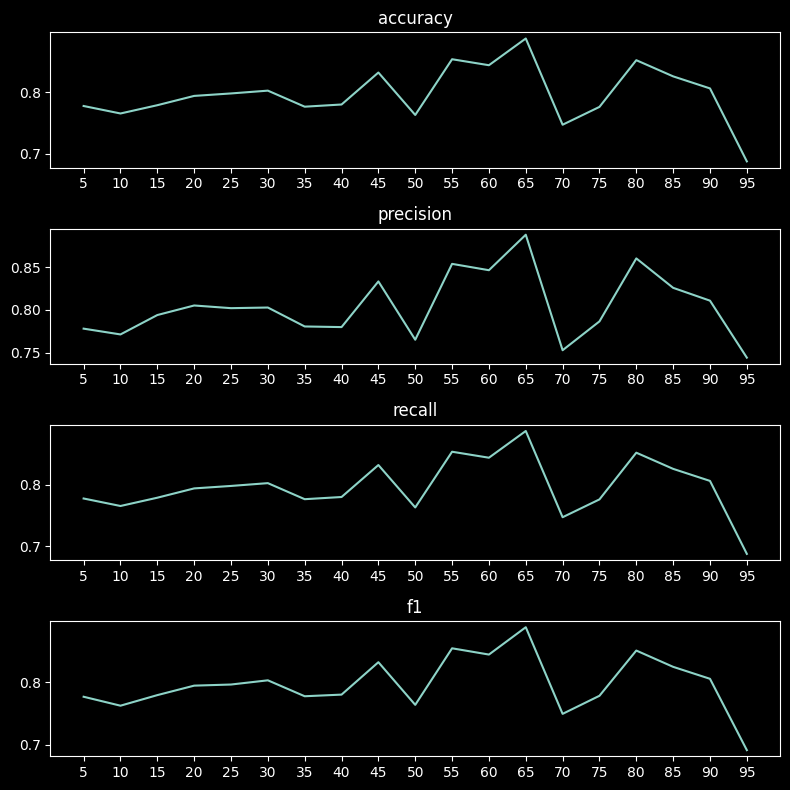

In [ ]:
fig, ax = plt.subplots(nrows=4, figsize=(8, 8))
metric_names = ["accuracy", "precision", "recall", "f1"]
metrics = {name: [] for name in metric_names}
for i in range(5, 100, 5):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=i / 100)

    model = GaussianNB().fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    metrics["accuracy"].append(accuracy_score(y_test, y_test_pred))
    metrics["precision"].append(
        precision_score(y_test, y_test_pred, average="weighted"),
    )
    metrics["recall"].append(recall_score(y_test, y_test_pred, average="weighted"))
    metrics["f1"].append(f1_score(y_test, y_test_pred, average="weighted"))

for i, mn in enumerate(metric_names):
    ax[i].set_title(mn)
    ax[i].plot(metrics[mn])
    ax[i].set_xticks(range(19), range(5, 100, 5))

fig.tight_layout()


2) Создайте универсальную функцию, которая подсчитывает все метрики по любой модели и выводит их в виде таблицы.

In [ ]:
# Использовалась ранее

def analise(model_class, x, y, train_size=0.8):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_size)
    model = model_class().fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    metrics = pd.DataFrame(
        {
            "Train": [
                accuracy_score(y_train, y_train_pred),
                precision_score(y_train, y_train_pred, average="weighted"),
                recall_score(y_train, y_train_pred, average="weighted"),
                f1_score(y_train, y_train_pred, average="weighted"),
            ],
            "Test": [
                accuracy_score(y_test, y_test_pred),
                precision_score(y_test, y_test_pred, average="weighted"),
                recall_score(y_test, y_test_pred, average="weighted"),
                f1_score(y_test, y_test_pred, average="weighted"),
            ],
        },
        index=["Accuracy", "Precision", "Recall", "F1"],
    )
    display(metrics)



3) Создайте функцию, принимающая на вход датасет, которая проверяет наибольшее количество разных моделей машинного обучения и выдающая датафрейм с таблицей всех метрик.

In [ ]:
def compare_models(
    x,
    y,
    model_classes=[
        GaussianNB,
        ComplementNB,
        BernoulliNB,
        DecisionTreeClassifier,
        SVC,
        NearestCentroid,
    ],
):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
    metrics = {}
    for model_class in model_classes:
        model = model_class().fit(x_train, y_train)

        y_test_pred = model.predict(x_test)

        metrics[model_class.__name__] = [
            accuracy_score(y_test, y_test_pred),
            precision_score(y_test, y_test_pred, average="weighted"),
            recall_score(y_test, y_test_pred, average="weighted"),
            f1_score(y_test, y_test_pred, average="weighted"),
        ]
    return pd.DataFrame(metrics, index=["Accuracy", "Precision", "Recall", "F1"])

In [ ]:
compare_models(x, y)

,GaussianNB,ComplementNB,BernoulliNB,DecisionTreeClassifier,SVC,NearestCentroid
Accuracy,0.803279,0.770492,0.803279,0.770492,0.737705,0.639344
Precision,0.811458,0.786247,0.803097,0.769909,0.747566,0.642665
Recall,0.803279,0.770492,0.803279,0.770492,0.737705,0.639344
F1,0.803915,0.770862,0.802306,0.769357,0.728702,0.640320
